# End Point Assesment: Predicting High Impact Papers 
# *Modelling*

In an effort to assist HDR UK's Impact Committee in scaling their processes, the goal of this project is to provide predictions on a publication's impact by taking into account factors like HDR UK affiliation, open science, team science, PPIE, and more.

The input data includes retrospective monthly measurements of each criteria alongside bibliometric data.

This is the 2nd notebook in a set of 2 - please see 'Exploratory Data Analyses' for the 1st notebook which generates the data required below.

## 1. Set up
First, run the following cell to:

* import pandas with an alias of pd
* import visualisation packages and set plotting styling
* read a CSV containing the retrospective scoring data
* create a DataFrame df containing the data
* take a look at the first few/last rows of the DataFrame


In [1]:
##Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import simulate as sm

plt.style.use('seaborn')


pd.set_option('display.max_rows', 250)
%matplotlib inline
#print(plt.style.available)

The gym library is not installed, falling back our implementation of gym.spaces. To remove this message pip install simulate[rl]
The gym library is not installed, falling back our implementation of gym.spaces. To remove this message pip install simulate[rl]
The gym library is not installed, falling back our implementation of gym.spaces. To remove this message pip install simulate[rl]
<ipython-input-1-623e457b191c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
##Import data
df = pd.read_excel(r'C:\Users\HollydawnMurray\Downloads\Impact_Selection_Biblio27-03-2023.xlsx')

print('Dataset Shape:', df.shape)

df.head()


Dataset Shape: (349, 65)


,Identifier,Authors_x,Title_x,National Priority,OA,HDR UK Affiliation,Impact,Research Excellence,Team Science,Scale,...,Fields of Research (ANZSRC 2020),RCDC Categories,HRCS HC Categories,HRCS RAC Categories,Health Research Areas,Broad Research Areas,Cancer Types,CSO Categories,Units of Assessment,Sustainable Development Goals
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0,3.0,4,3,3,4,...,42 Health Sciences; 4202 Epidemiology; 4203 He...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1,5.0,2,3,5,5,...,32 Biomedical and Clinical Sciences; 3202 Clin...,Clinical Research; Emergency Care; Health Serv...,Injuries and accidents,7.3 Management and decision making; 8.1 Organi...,Health services & systems,Health Services Research,NaN,NaN,A01 Clinical Medicine,3 Good Health and Well Being
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1,6.0,4,5,5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0,5.0,2,5,8,7,...,31 Biological Sciences; 3102 Bioinformatics an...,Genetics,NaN,NaN,NaN,NaN,NaN,NaN,A01 Clinical Medicine,NaN
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1,6.5,2,6,7,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check distribution of IS
df['Impact Selection'].value_counts(normalize = True)

0    0.859599
1    0.140401
Name: Impact Selection, dtype: float64

In [4]:
#check data types
df.dtypes

Identifier                                object
Authors_x                                 object
Title_x                                   object
National Priority                         object
OA                                         int64
HDR UK Affiliation                       float64
Impact                                     int64
Research Excellence                        int64
Team Science                               int64
Scale                                      int64
Open Science                               int64
PP Involvement                             int64
PP Impact                                  int64
EDI                                        int64
Impact Selection                           int64
Rank                                     float64
Publication ID                            object
PMID                                     float64
PMCID                                     object
ISBN                                     float64
Title_y             

In [5]:
#drop unneeded columns - using contextual knowledge
df = df.drop(columns=['Rank', 'Publication ID', 'PMID', 'PMCID', 'ISBN', 'Volume', 'PubYear', 'Anthology title'])


In [6]:
#Account for null values
df=df.fillna(value=0)
df.isnull().sum().sum()

0

In [7]:
#address required objects by creating dummies 
df = pd.get_dummies(df, columns=['Fields of Research (ANZSRC 2020)','RCDC Categories', 'HRCS HC Categories', 'Health Research Areas', 'Broad Research Areas', 'Cancer Types', 'CSO Categories', 'Units of Assessment','Sustainable Development Goals'])
df.head()

,Identifier,Authors_x,Title_x,National Priority,OA,HDR UK Affiliation,Impact,Research Excellence,Team Science,Scale,...,Units of Assessment_D26 Modern Languages and Linguistics,Sustainable Development Goals_0,Sustainable Development Goals_10 Reduced Inequalities; 3 Good Health and Well Being,Sustainable Development Goals_10 Reduced Inequalities; 3 Good Health and Well Being; 5 Gender Equality,Sustainable Development Goals_12 Responsible Consumption and Production; 13 Climate Action,"Sustainable Development Goals_16 Peace, Justice and Strong Institutions; 3 Good Health and Well Being",Sustainable Development Goals_3 Good Health and Well Being,Sustainable Development Goals_4 Quality Education,Sustainable Development Goals_5 Gender Equality,Sustainable Development Goals_7 Affordable and Clean Energy
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0,3.0,4,3,3,4,...,0,1,0,0,0,0,0,0,0,0
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1,5.0,2,3,5,5,...,0,0,0,0,0,0,1,0,0,0
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1,6.0,4,5,5,8,...,0,1,0,0,0,0,0,0,0,0
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0,5.0,2,5,8,7,...,0,1,0,0,0,0,0,0,0,0
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1,6.5,2,6,7,10,...,0,1,0,0,0,0,0,0,0,0


In [8]:
#drop other objects
df = df.select_dtypes(exclude=['object'])
df.head()

,OA,HDR UK Affiliation,Impact,Research Excellence,Team Science,Scale,Open Science,PP Involvement,PP Impact,EDI,...,Units of Assessment_D26 Modern Languages and Linguistics,Sustainable Development Goals_0,Sustainable Development Goals_10 Reduced Inequalities; 3 Good Health and Well Being,Sustainable Development Goals_10 Reduced Inequalities; 3 Good Health and Well Being; 5 Gender Equality,Sustainable Development Goals_12 Responsible Consumption and Production; 13 Climate Action,"Sustainable Development Goals_16 Peace, Justice and Strong Institutions; 3 Good Health and Well Being",Sustainable Development Goals_3 Good Health and Well Being,Sustainable Development Goals_4 Quality Education,Sustainable Development Goals_5 Gender Equality,Sustainable Development Goals_7 Affordable and Clean Energy
0,0,3.0,4,3,3,4,5,4,5,5,...,0,1,0,0,0,0,0,0,0,0
1,1,5.0,2,3,5,5,4,3,6,6,...,0,0,0,0,0,0,1,0,0,0
2,1,6.0,4,5,5,8,9,3,6,6,...,0,1,0,0,0,0,0,0,0,0
3,0,5.0,2,5,8,7,8,3,6,6,...,0,1,0,0,0,0,0,0,0,0
4,1,6.5,2,6,7,10,7,8,7,8,...,0,1,0,0,0,0,0,0,0,0


In [48]:
pd.set_option('display.max_rows', None)

#determine baseline and select features  for engineering later on 
corr=df.corrwith(df['Impact Selection'])
corr_sorted= corr.sort_values(ascending=False)
  
print(corr_sorted)



Impact Selection                                                                                                                                                                                                                                                                                               1.000000
Scale                                                                                                                                                                                                                                                                                                          0.287936
HDR UK Affiliation                                                                                                                                                                                                                                                                                             0.278655
EDI                                                             

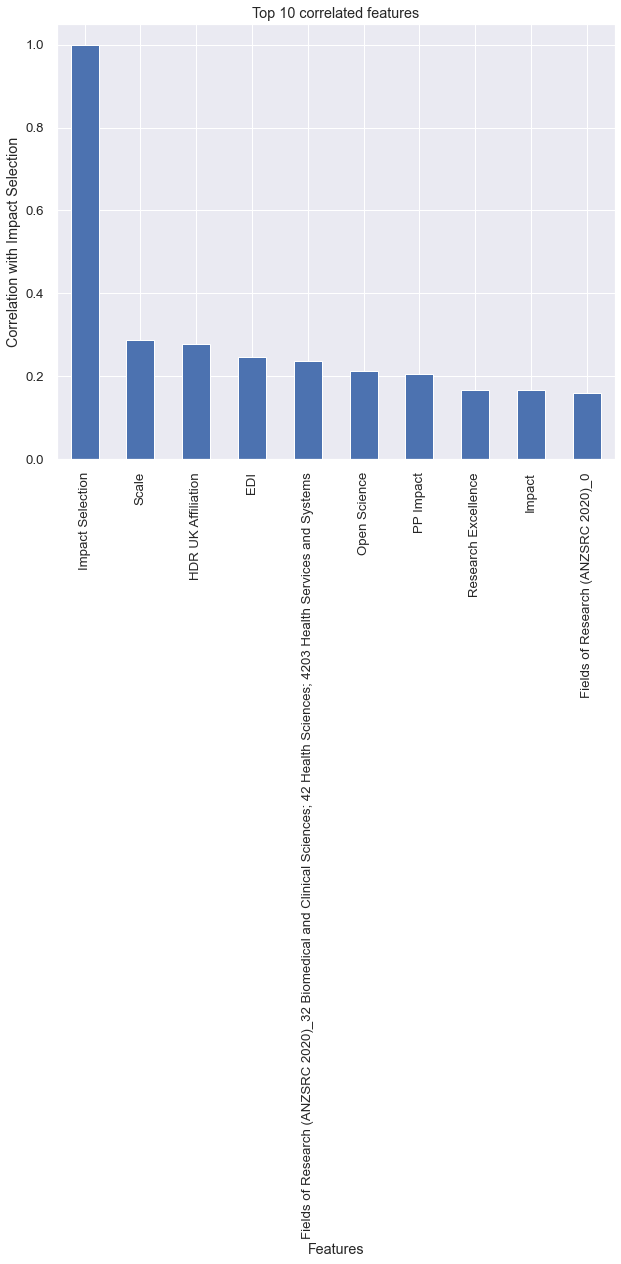

In [51]:
#plot the correlation
subset = corr_sorted.nlargest(10)
subset.plot(kind='bar', figsize=(10,8))
plt.title('Top 10 correlated features')
plt.xlabel('Features')
plt.ylabel('Correlation with Impact Selection')
plt.show()

Top features for later use: Scale, HDR UK Affiliation, EDI, Health Services and Systems, Open Science, PP Impact

In [10]:
pd.set_option('display.max_rows', 10)

## 2. Baseline Models

Apply the following algortihms: logistic regression, random forest, gradient boosting, decision tree, SVC (both), neural network and use a 70-30 train/test split. Evaluation metrics after training each model include: accuracy, F1 score, and ROC AUC. Confusion matrices are plotted for each model.

In [11]:
# import functions from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.utils import resample

In [12]:
# target variable
y = df["Impact Selection"]
# predictors
X = df.drop("Impact Selection", axis = 1)

In [13]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train.value_counts()

0    203
1     41
Name: Impact Selection, dtype: int64

In [68]:
#Separate majority and minority classes
df_majority = df[df['Impact Selection']==0]
df_minority = df[df['Impact Selection']==1]

#Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True,     # sample with replacement
n_samples=len(df_majority),    # to match majority class
random_state=42) # reproducible results

#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Split the data into predictors and target variable
X = df_upsampled.drop("Impact Selection", axis = 1)
y = df_upsampled["Impact Selection"]

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Check the class distribution of y_train
y_train.value_counts()

1    218
0    202
Name: Impact Selection, dtype: int64

In [15]:
import warnings
warnings.filterwarnings("ignore")

Logistic Regression trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.
                                        Precision    Recall  F1-score  \
Logistic Regression                      0.662434  0.801471  0.723778   
Decision Tree                            0.742169  0.863971  0.796680   
Support Vector Machine (Linear Kernel)   0.684703  0.875735  0.763597   
Support Vector Machine (RBF Kernel)      0.655147  0.452941  0.502012   
Neural Network                           0.693093  0.875735  0.778339   
Random Forest                            0.878929  0.865441  0.873363   
Gradient Boosting                        0.764773  0.852206  0.796891   

                                         ROC AUC  
Logistic Regression                     0.812142  
Decision Tree                           0.783208  
Support Vector Machine (Linear Kernel)  0.8

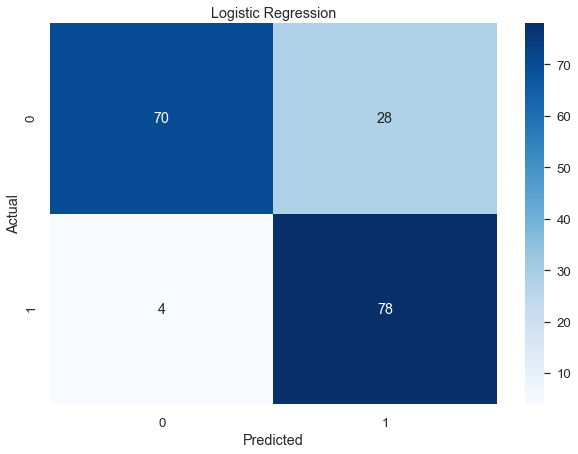

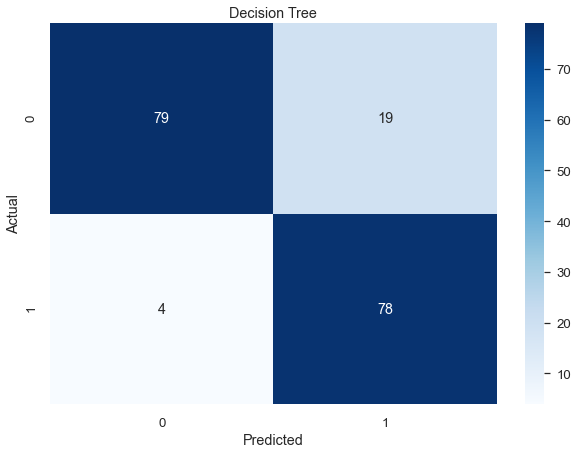

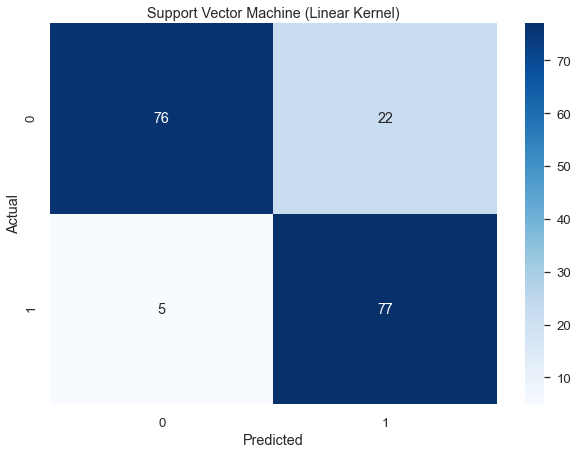

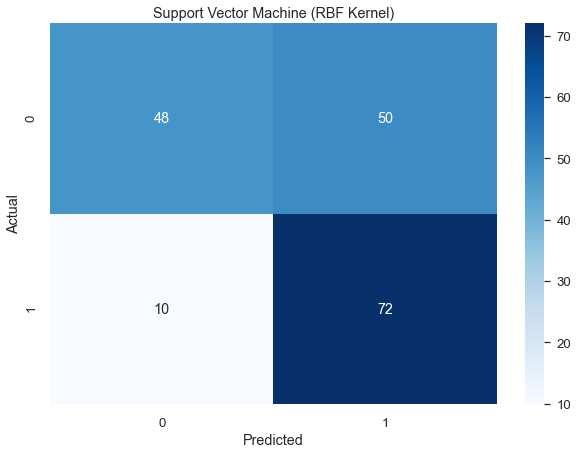

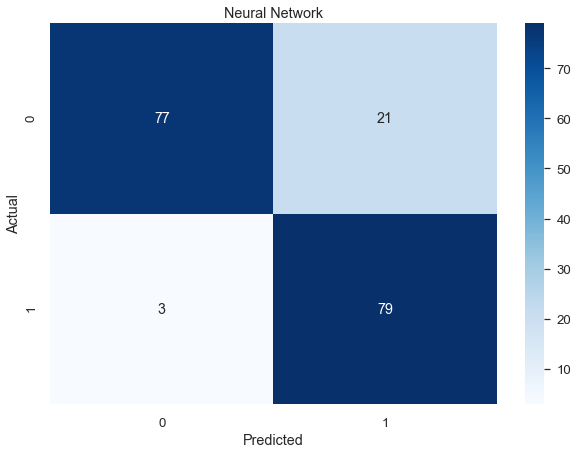

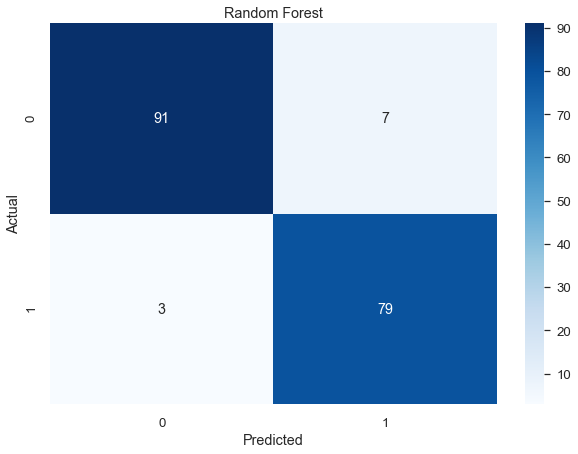

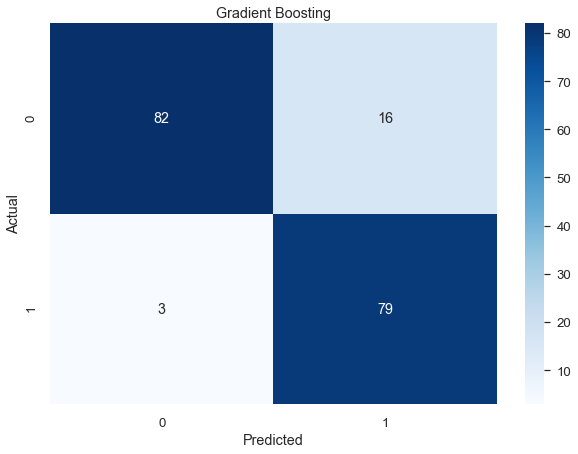

In [65]:
#train baseline models and evaluate with standard metrics
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = pd.DataFrame(columns=["Precision", "Recall", "F1-score", "ROC AUC"])

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    
    # Calculate metrics using cross-validation
    precision = cross_val_score(model, X_test, y_test, cv=5, scoring="precision").mean()
    recall = cross_val_score(model, X_test, y_test, cv=5, scoring="recall").mean()
    f1 = cross_val_score(model, X_test, y_test, cv=5, scoring="f1").mean()
    roc_auc = cross_val_score(model, X_test, y_test, cv=5, scoring="roc_auc").mean()
    
    # Add results to dataframe
    results.loc[name] = [precision, recall, f1, roc_auc]
    
print(results)

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index = np.unique(y_test), columns = np.unique(y_test))
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    plt.title(name)
    sns.heatmap(cm_df, annot=True, cmap='Blues')
    plt.show()

In [17]:
#Use 3-fold cross validation for choosing the top models
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

mean_df = []
for name, model in models.items():
  mean_arr = {}
  cv_results = cross_val_score(model, X_train, y_train, cv=3)
  print(name, cv_results)
  mean = np.mean(cv_results)
  mean_arr['name']=name
  mean_arr['result']=mean
  mean_df.append(mean_arr)

                   Logistic Regression [0.83571429 0.88571429 0.84285714]
                         Decision Tree [0.87857143 0.9        0.85714286]
Support Vector Machine (Linear Kernel) [0.85714286 0.93571429 0.87857143]
   Support Vector Machine (RBF Kernel) [0.81428571 0.76428571 0.80714286]
                        Neural Network [0.82142857 0.94285714 0.88571429]
                         Random Forest [0.93571429 0.94285714 0.95714286]
                     Gradient Boosting [0.9        0.92142857 0.91428571]


In [18]:
pd.DataFrame(mean_df)

,name,result
0,Logistic Regression,0.854762
1,Decision Tree,0.878571
2,Support Vector Machine (Linear Kernel),0.890476
3,Support Vector Machine (RBF Kernel),0.795238
4,Neural Network,0.883333
5,Random Forest,0.945238
6,Gradient Boosting,0.911905


The top models selected to move forward with are: Random Forest and Gradient Boosting.

In [19]:
#Use 5-fold to choose between RF and Gradient Boosting

#Gradient boosting

clf = GradientBoostingClassifier()
cv_results = cross_val_score(clf, X, y, cv=5)
cv_results

array([0.81666667, 0.88333333, 0.96666667, 0.95833333, 0.95      ])

In [20]:
np.mean(cv_results)
print ("Accuracy of Gradient Boosting is", (np.mean(cv_results)))

Accuracy of Gradient Boosting is 0.915


In [21]:
#Random Forest
m = RandomForestClassifier()
print(cross_val_score(RandomForestClassifier(),X_train, y_train,cv=5))

[0.96428571 0.92857143 0.96428571 0.96428571 0.94047619]


In [35]:
print ("Accuracy of Random Forest is", (np.mean([0.96428571, 0.92857143, 0.96428571, 0.96428571, 0.94047619])))

Accuracy of Random Forest is 0.9523809499999999


# Random Forest Implementation

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
#feature importance
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('OA', 0.01),
 ('HDR UK Affiliation', 0.08),
 ('Impact', 0.03),
 ('Research Excellence', 0.05),
 ('Team Science', 0.03),
 ('Scale', 0.07),
 ('Open Science', 0.05),
 ('PP Involvement', 0.03),
 ('PP Impact', 0.05),
 ('EDI', 0.06),
 ('Times cited', 0.05),
 ('Fields of Research (ANZSRC 2020)_0', 0.02),
 ('Fields of Research (ANZSRC 2020)_31 Biological Sciences; 3101 Biochemistry and Cell Biology',
  0.0),
 ('Fields of Research (ANZSRC 2020)_31 Biological Sciences; 3101 Biochemistry and Cell Biology; 3105 Genetics',
  0.0),
 ('Fields of Research (ANZSRC 2020)_31 Biological Sciences; 3101 Biochemistry and Cell Biology; 3105 Genetics; 32 Biomedical and Clinical Sciences; 3205 Medical Biochemistry and Metabolomics',
  0.0),
 ('Fields of Research (ANZSRC 2020)_31 Biological Sciences; 3101 Biochemistry and Cell Biology; 32 Biomedical and Clinical Sciences; 3214 Pharmacology and Pharmaceutical Sciences; 34 Chemical Sciences; 3404 Medicinal and Biomolecular Chemistry',
  0.0),
 ('Fields of Resear

Text(0.5, 0, 'Feature Importance')

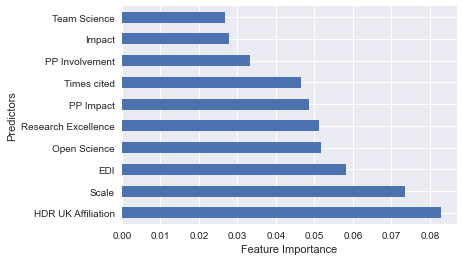

In [25]:
#plotting feature importance
feat_importances_plot = pd.Series(rf.feature_importances_, index=X.columns)
top_feat_importances_plot = feat_importances_plot.nlargest(10)
top_feat_importances_plot.plot(kind='barh')
plt.ylabel("Predictors")
plt.xlabel("Feature Importance")

In [26]:
# Limit model to top 5 correlated features determined earlier using correlation/matching above top feature selection
# Select the columns of interest
X_reduced = df_upsampled[['Scale', 'HDR UK Affiliation', 'EDI', 'Open Science', 'PP Impact']]
# Select the target variable
y = df_upsampled["Impact Selection"]

# Split the data into training and testing sets
X_red_train, X_red_test, y_red_train , y_red_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

In [27]:
print(cross_val_score(RandomForestClassifier(),X_red_train, y_red_train,cv=5))

[0.96875    0.9375     0.96875    0.82291667 0.9375    ]


In [33]:
print ("Accuracy of Random Forest is", (np.mean([0.96875, 0.9375, 0.96875, 0.82291667, 0.9375])))

Accuracy of Random Forest is 0.927083334


In [29]:
# Adjust hyperparameters to improve model
# Define the parameter grid
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
  
# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
  
# Fit the grid search object to the training data
grid_search.fit(X, y)
  
# Get the best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.96


In [30]:
m2 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
print(cross_val_score(RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50),X_train, y_train,cv=5))

[0.95238095 0.89285714 0.96428571 0.95238095 0.94047619]


In [34]:
print ("Accuracy of Random Forest is", (np.mean([0.95238095, 0.89285714, 0.96428571, 0.95238095, 0.94047619])))

Accuracy of Random Forest is 0.9404761880000001


In [55]:
# Fit the model to the training data
m.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = m.predict(X_test)

# Performance Evaluation

In [56]:
accuracy_score(y_test, y_pred)


0.95

In [57]:
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[79,  3],
       [ 6, 92]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        98
           1       0.93      0.96      0.95        82

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180



In [59]:
y_prob= rf.predict_proba((X_test))

In [60]:
prob_1 = y_prob[::,1]
     

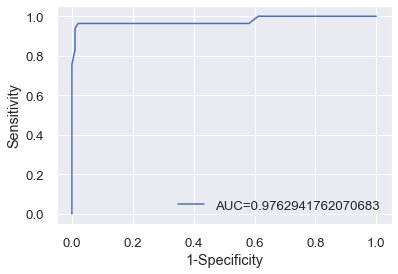

In [61]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  prob_1)
auc = metrics.roc_auc_score(y_test, prob_1)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.legend(loc=4)
plt.show()

# 4.Onward use and Housekeeping


In [36]:
# Make predictions on new data
new_data = ... # new data that you want to predict on

# Extract relevant features from the new data
features = ['feature_1', 'feature_2', ..., 'feature_n']
X_new = new_data[features]

# Make predictions using the trained model
predictions= m.predict(X_new)

# Optional: Add prediction results back to the new_data dataframe
new_data['predicted_target'] = predictions

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import sys
!{sys.executable} -m pip install watermark
%load_ext watermark 
%watermark 
%watermark --iversions